In [119]:
using PyPlot 
using LaTeXStrings

In [5]:
#Define constants

C_m = 9 * pi

E_Na = 115

E_K = -12

V_rest = 10.6

G_Na = 1080 * pi

G_K = 324 * pi

G_m = 2.7 * pi

g_A = 10
g_G = 10

k_p = 5
V_p = 62

E_A = 60
E_G = -20

alpha_A = 1.1
alpha_G = 5

beta_A = 0.19
beta_G = 0.3

0.3

In [6]:
function alpha_n(V)
    return (10 - V) / (100 * (exp((10 - V) / 10) - 1))
end

function beta_n(V)
    return 0.125 * exp(-V / 80)
end

function alpha_m(V)
    return (25 - V) / (10 * (exp((25 - V) / 10) - 1))
end

function beta_m(V)
    return 4 * exp(-V / 18)
end

function alpha_h(V)
    return 0.07 * exp(-V / 20)
end

function beta_h(V)
    return 1 / (exp((30 - V) / 10) + 1)
end

beta_h (generic function with 1 method)

In [7]:
function n_dot(n, V)
    return alpha_n(V) * (1 - n) - beta_n(V) * n
end

function m_dot(m, V)
    return alpha_m(V) * (1 - m) - beta_m(V) * m
end

function h_dot(h, V)
    return alpha_h(V) * (1 - h) - beta_h(V) * h
end

function I_A(r, V)
    return g_A * r * (E_A - V)
end

function I_G(r, V)
    return g_G * r * (E_G - V)
end

function T(V_pre)
    return 1 / (1 + exp(-(V_pre - V_p) / k_p))
end

function r_A_dot(r, V_pre)
    return alpha_A * T(V_pre) * (1 - r) - beta_A * r
end

function r_G_dot(r, V_pre)
    return alpha_G * T(V_pre) * (1 - r) - beta_G * r
end

function V_dot(V, n, m, h, I0, I_A, I_G, t)
    return (G_Na * m^3 * h * (E_Na - V) + G_K * n^4 * (E_K - V) + G_m * (V_rest - V) + I(t, I0) + I_A + I_G) / C_m
end

V_dot (generic function with 1 method)

In [8]:
function I(t,I0)
    return I0
end

I (generic function with 1 method)

# Unidirectional excitatory

In [123]:
function unidirectional_excitatory(N, h_int, dt, I0, V0, n0, m0, h0)

    writting_period = Int(floor(dt / h_int))
    
    data = zeros(11, N)
    
    data[1, 1] = 0 #t
    data[2, 1] = V0[1] #V1
    data[3, 1] = V0[2] #V2
    data[4, 1] = n0[2] #n2
    data[5, 1] = m0[2] #m2
    data[6, 1] = h0[2] #h2
    data[7, 1] = n0[1] #n1
    data[8, 1] = m0[1] #m1
    data[9, 1] = h0[1] #h1
    data[10, 1] = 0 #I excitatory
    data[11, 1] = 0 #I inhibitory
    
    V1 = V0[1]
    n1 = n0[1]
    m1 = m0[1]
    h1 = h0[1]
    
    V2 = V0[2]
    n2 = n0[2]
    m2 = m0[2]
    h2 = h0[2]
    
    r_A = 0
    r_G = 0
    
    I_A = 0
    I_G = 0
    
    i = 1
    
    t = 0
    
    while i < N
        
        for k in 1 : writting_period
            
            V1_pre = V1
            V2_pre = V2
            
            # 1st neuron
            n1 += h_int * n_dot(n1, V1)
            m1 += h_int * m_dot(m1, V1)
            h1 += h_int * h_dot(h1, V1)
            
            V1 += h_int * V_dot(V1, n1, m1, h1, I0, 0, 0, t)
            
            # 2nd neuron (with excitatory current)
            n2 += h_int * n_dot(n2, V2)
            m2 += h_int * m_dot(m2, V2)
            h2 += h_int * h_dot(h2, V2)
            
            r_A += h_int * r_A_dot(r_A, V1_pre) 
            r_G += h_int * r_G_dot(r_G, V1_pre)
            
            I_A = g_A * r_A * (E_A - V2) # Plug in excitatory current
            I_G = 0 #g_G * r_G * (E_G - V2)
            
            V2 += h_int * V_dot(V2, n2, m2, h2, I0, I_A, I_G, t)
            
            t += h_int
            
        end
            
        i += 1
        
        data[1, i]= t
        data[2, i] = V1
        data[3, i] = V2
        data[4, i] = n2
        data[5, i] = m2
        data[6, i] = h2
        data[7, i] = n1
        data[8, i] = m1
        data[9, i] = h1
        data[10, i] = I_A 
        data[11, i] = I_G

    end
        
    return data
    
end

unidirectional_excitatory (generic function with 1 method)

In [124]:
N = 2 * 10^5

h_int = 0.001
dt = h_int

I0 = 280

V0 = [0, 0]
n0 = [0.5, 0.5]
m0 = [0.5, 0.5]
h0 = [0.5, 0.5]

result = unidirectional_excitatory(N, h_int, dt, I0, V0, n0, m0, h0)

11×200000 Array{Float64,2}:
 0.0  0.001       0.002      0.003       …  199.998      199.999    
 0.0  0.838875    1.66035    2.46529          0.324508     0.326501 
 0.0  0.838875    1.66035    2.46529         -1.39967     -1.39771  
 0.5  0.499967    0.499935   0.499906         0.446489     0.446462 
 0.5  0.498112    0.496329   0.494645         0.0426339    0.0426438
 0.5  0.500011    0.500019   0.500024    …    0.386565     0.386595 
 0.5  0.499967    0.499935   0.499906         0.404358     0.404342 
 0.5  0.498112    0.496329   0.494645         0.0520715    0.0520836
 0.5  0.500011    0.500019   0.500024         0.445727     0.445744 
 0.0  2.71826e-6  5.8496e-6  9.45127e-6      90.4084      90.3884   
 0.0  0.0         0.0        0.0         …    0.0          0.0      

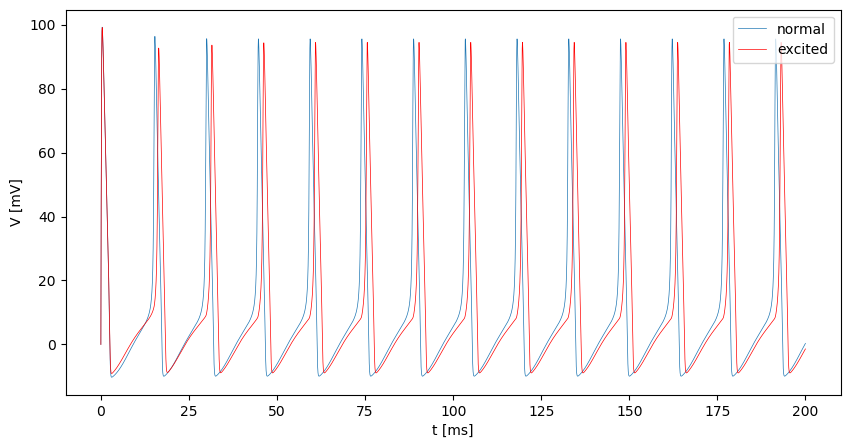

sys:1: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


In [93]:
fig = figure("pyplot",figsize=(10,5))

plot(result[1, :], result[2, :],lw=0.5, label="normal")
plot(result[1, :], result[3, :],lw=0.5, label="excited",color="red")

xlabel("t [ms]") 
ylabel("V [mV]")
legend()
savefig("Unidir-Exci.pdf")

In [125]:
I_Na = @. G_Na * result[5, :]^3 * result[6, :] * (result[3, :] - E_Na) 
I_K = @. G_K * result[4, :]^4 * (result[3, :] - E_K);
I_L = @. G_m * (V_rest - result[3, :]);

I_Na_1 = @. G_Na * result[8, :]^3 * result[9, :] * (result[2, :] - E_Na) 
I_K_1 = @. G_K * result[7, :]^4 * (result[2, :] - E_K);
I_L_1 = @. G_m * (V_rest - result[2, :]);

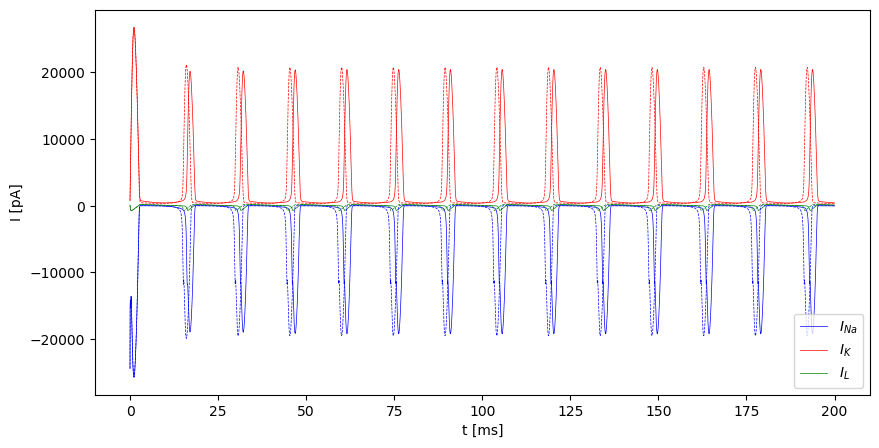

sys:1: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


In [126]:
fig = figure("pyplot",figsize=(10,5))

# "normal" neuron:
plot(result[1, :], I_Na, color="blue", label=L"I_{Na}",linewidth=0.5)
plot(result[1, :], I_K, color="red", label=L"I_K",linewidth=0.5)
plot(result[1, :], I_L, color="green", label=L"I_L",linewidth=0.5)

# excited neuron
plot(result[1, :], I_Na_1, color="blue", label="", linestyle="dashed",linewidth=0.5)
plot(result[1, :], I_K_1, color="red",  label="", linestyle="dashed",linewidth=0.5)
plot(result[1, :], I_L_1, color="green", label="", linestyle="dashed",linewidth=0.5)

#plot(result[1, :], result[10, :].*20, color="black", label="I_A × 20",linewidth = 0.7)

xlabel("t [ms]")
ylabel("I [pA]")
legend()
savefig("Curr-Unidir-Exci.pdf")

# Unidirectional inhibitory

In [127]:
function unidirectional_inhibitory(N, h_int, dt, I0, V0, n0, m0, h0)

    writting_period = Int(floor(dt / h_int))
    
    data = zeros(11, N)
    
    data[1, 1] = 0 #t
    data[2, 1] = V0[1] #V1
    data[3, 1] = V0[2] #V2
    data[4, 1] = n0[2] #n2
    data[5, 1] = m0[2] #m2
    data[6, 1] = h0[2] #h2
    data[7, 1] = n0[1] #n1
    data[8, 1] = m0[1] #m1
    data[9, 1] = h0[1] #h1
    data[10, 1] = 0 #I excitatory
    data[11, 1] = 0 #I inhibitory
    
    V1 = V0[1]
    n1 = n0[1]
    m1 = m0[1]
    h1 = h0[1]
    
    V2 = V0[2]
    n2 = n0[2]
    m2 = m0[2]
    h2 = h0[2]
    
    r_A = 0
    r_G = 0
    
    I_A = 0
    I_G = 0
    
    i = 1
    
    t = 0
    
    while i < N
        
        for k in 1 : writting_period
            
            V1_pre = V1
            V2_pre = V2
            
            # 1st neuron (normal)
            n1 += h_int * n_dot(n1, V1)
            m1 += h_int * m_dot(m1, V1)
            h1 += h_int * h_dot(h1, V1)
            
            V1 += h_int * V_dot(V1, n1, m1, h1, I0, 0, 0, t)
            
            # 2nd neuron (with inhibitory current)
            n2 += h_int * n_dot(n2, V2)
            m2 += h_int * m_dot(m2, V2)
            h2 += h_int * h_dot(h2, V2)
            
            r_A += h_int * r_A_dot(r_A, V1_pre) 
            r_G += h_int * r_G_dot(r_G, V1_pre)
            
            I_A = 0#g_A * r_A * (E_A - V2)
            I_G = g_G * r_G * (E_G - V2) # Plug in the inhibitory current
            
            V2 += h_int * V_dot(V2, n2, m2, h2, I0, I_A, I_G, t)
            
            t += h_int
            
        end
            
        i += 1
        
        data[1, i]= t
        data[2, i] = V1
        data[3, i] = V2
        data[4, i] = n2
        data[5, i] = m2
        data[6, i] = h2
        data[7, i] = n1
        data[8, i] = m1
        data[9, i] = h1
        data[10, i] = I_A 
        data[11, i] = I_G
        
    end
        
    return data
    
end

unidirectional_inhibitory (generic function with 1 method)

In [131]:
N = 2 * 10^5

h_int = 0.001
dt = h_int

I0 = 280

V0 = [0, 0]
n0 = [0.5, 0.5]
m0 = [0.5, 0.5]
h0 = [0.5, 0.5]

result = unidirectional_inhibitory(N, h_int, dt, I0, V0, n0, m0, h0)

11×200000 Array{Float64,2}:
 0.0   0.001        0.002        0.003       …  199.998      199.999    
 0.0   0.838875     1.66035      2.46529          0.324508     0.326501 
 0.0   0.838875     1.66035      2.46529          4.03703      4.03899  
 0.5   0.499967     0.499935     0.499906         0.381695     0.381695 
 0.5   0.498112     0.496329     0.494645         0.07928      0.079297 
 0.5   0.500011     0.500019     0.500024    …    0.475164     0.475161 
 0.5   0.499967     0.499935     0.499906         0.404358     0.404342 
 0.5   0.498112     0.496329     0.494645         0.0520715    0.0520836
 0.5   0.500011     0.500019     0.500024         0.445727     0.445744 
 0.0   0.0          0.0          0.0              0.0          0.0      
 0.0  -4.11857e-6  -9.36525e-6  -1.59488e-5  …  -22.8572     -22.8522   

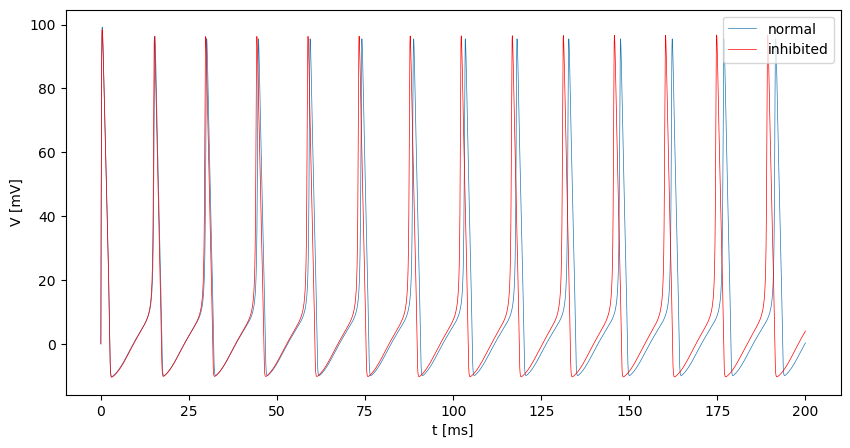

sys:1: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


In [132]:
fig = figure("pyplot",figsize=(10,5))

plot(result[1, :], result[2, :],lw=0.5, label="normal")
plot(result[1, :], result[3, :],lw=0.5, label="inhibited",color="red")

xlabel("t [ms]") 
ylabel("V [mV]")

legend()
savefig("Unidir-Inhi.pdf")

In [133]:
I_Na = @. G_Na * result[5, :]^3 * result[6, :] * (result[3, :] - E_Na) 
I_K = @. G_K * result[4, :]^4 * (result[3, :] - E_K);
I_L = @. G_m * (V_rest - result[3, :]);

I_Na_1 = @. G_Na * result[8, :]^3 * result[9, :] * (result[2, :] - E_Na) 
I_K_1 = @. G_K * result[7, :]^4 * (result[2, :] - E_K);
I_L_1 = @. G_m * (V_rest - result[2, :]);

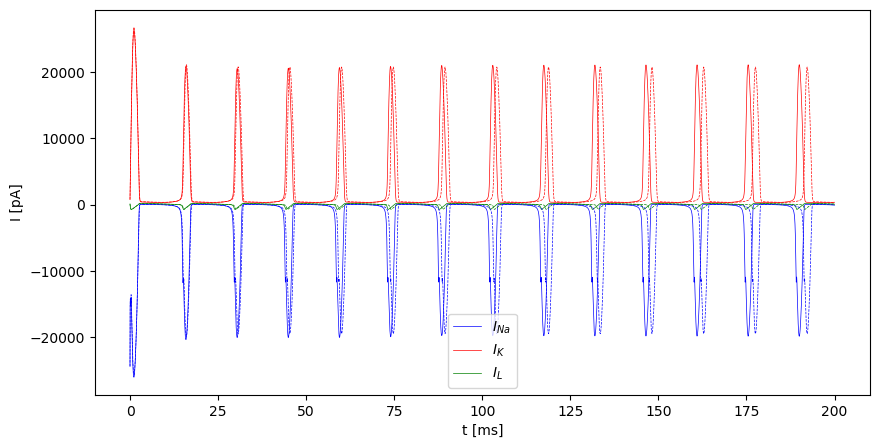

sys:1: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


In [134]:
fig = figure("pyplot",figsize=(10,5))

# "normal" neuron:
plot(result[1, :], I_Na, color="blue", label=L"I_{Na}",linewidth=0.5)
plot(result[1, :], I_K, color="red", label=L"I_K",linewidth=0.5)
plot(result[1, :], I_L, color="green", label=L"I_L",linewidth=0.5)

# excited neuron
plot(result[1, :], I_Na_1, color="blue", label="", linestyle="dashed",linewidth=0.5)
plot(result[1, :], I_K_1, color="red",  label="", linestyle="dashed",linewidth=0.5)
plot(result[1, :], I_L_1, color="green", label="", linestyle="dashed",linewidth=0.5)

#plot(result[1, 2*10^5:end], result[11, 2*10^5:end].*20, color="black", label="I_G × 20",linewidth = 0.7)
xlabel("t [ms]")
ylabel("I [pA]")
legend()
savefig("Curr-Unidir-Inhi.pdf")

# Mutual excitatory coupling

In [108]:
function mutually_excitatory(N, h_int, dt, I0, V0, n0, m0, h0)

    writting_period = Int(floor(dt / h_int))

    data = zeros(11, N)
    
    data[1, 1] = 0 #t
    data[2, 1] = V0[1] #V1
    data[3, 1] = V0[2] #V2
    data[4, 1] = n0[2] #n2
    data[5, 1] = m0[2] #m2
    data[6, 1] = h0[2] #h2
    data[7, 1] = n0[1] #n1
    data[8, 1] = m0[1] #m1
    data[9, 1] = h0[1] #h1
    data[10, 1] = 0 #I excitatory
    data[11, 1] = 0 #I inhibitory

    V1 = V0[1]
    n1 = n0[1]
    m1 = m0[1]
    h1 = h0[1]
    
    V2 = V0[2]
    n2 = n0[2]
    m2 = m0[2]
    h2 = h0[2]
    
    r_A1 = 0
    r_A2 = 0
    
    I_A = 0
    I_G = 0
    
    i = 1
    
    t = 0
    
    while i < N
        
        for k in 1 : writting_period
            
            V1_pre = V1
            V2_pre = V2
            
            # 1st neuron 
            n1 += h_int * n_dot(n1, V1)
            m1 += h_int * m_dot(m1, V1)
            h1 += h_int * h_dot(h1, V1)
            
            r_A1 += h_int * r_A_dot(r_A1, V2_pre) # mutually excitatory 
            
            I_A1 = g_A * r_A1 * (E_A - V1) # mutually excitatory 
 
            
            V1 += h_int * V_dot(V1, n1, m1, h1, I0, I_A1, 0, t)
            
            # 2nd neuron
            n2 += h_int * n_dot(n2, V2)
            m2 += h_int * m_dot(m2, V2)
            h2 += h_int * h_dot(h2, V2)
            
            r_A2 += h_int * r_A_dot(r_A2, V1_pre) # mutually excitatory 
            
            I_A2 = g_A * r_A2 * (E_A - V2) # mutually excitatory 
            
            V2 += h_int * V_dot(V2, n2, m2, h2, I0, I_A2, 0, t)
            
            t += h_int
            
        end
            
        i += 1
        
        data[1, i]= t
        data[2, i] = V1
        data[3, i] = V2
        data[4, i] = n2
        data[5, i] = m2
        data[6, i] = h2
        data[7, i] = n1
        data[8, i] = m1
        data[9, i] = h1
        data[10, i] = I_A
        data[11, i] = I_G
        
    end
        
    return data
    
end

mutually_excitatory (generic function with 1 method)

In [109]:
N = 2 * 10^5

h_int = 0.001
dt = h_int

I0 = 280

V0 = [0, 0]
n0 = [0.5, 0.5]
m0 = [0.5, 0.5]
h0 = [0.5, 0.5]

result = mutually_excitatory(N, h_int, dt, I0, V0, n0, m0, h0)

11×200000 Array{Float64,2}:
 0.0  0.001     0.002     0.003     0.004     …  199.998      199.999    
 0.0  0.838875  1.66035   2.46529   3.25447       22.9831      22.9345   
 0.0  0.838875  1.66035   2.46529   3.25447       22.9831      22.9345   
 0.5  0.499967  0.499935  0.499906  0.499879       0.740967     0.740944 
 0.5  0.498112  0.496329  0.494645  0.493053       0.763834     0.763195 
 0.5  0.500011  0.500019  0.500024  0.500025  …    0.0648025    0.0648018
 0.5  0.499967  0.499935  0.499906  0.499879       0.740967     0.740944 
 0.5  0.498112  0.496329  0.494645  0.493053       0.763834     0.763195 
 0.5  0.500011  0.500019  0.500024  0.500025       0.0648025    0.0648018
 0.0  0.0       0.0       0.0       0.0            0.0          0.0      
 0.0  0.0       0.0       0.0       0.0       …    0.0          0.0      

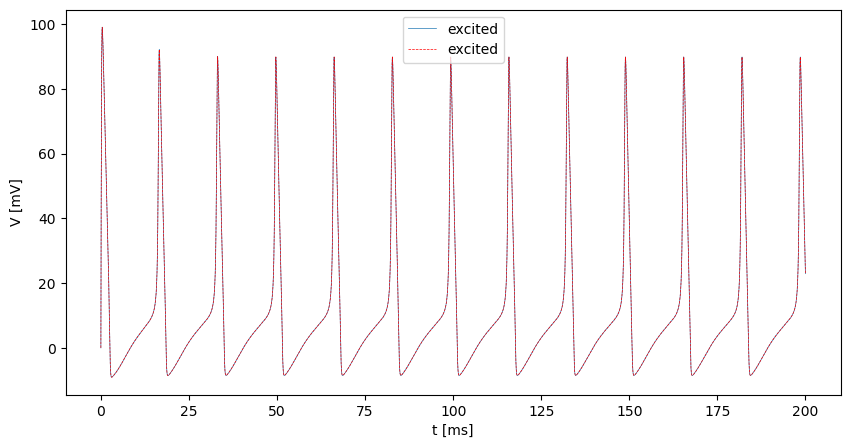

sys:1: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


In [63]:
fig = figure("pyplot",figsize=(10,5))

plot(result[1, :], result[2, :],lw=0.5, label="excited")
plot(result[1, :], result[3, :],lw=0.5, label="excited",linestyle="dashed",color="red")

xlabel("t [ms]") 
ylabel("V [mV]")

legend()
savefig("Mutual-Exci.pdf")

In [102]:
I_Na = @. G_Na * result[5, :]^3 * result[6, :] * (result[3, :] - E_Na) 
I_K = @. G_K * result[4, :]^4 * (result[3, :] - E_K);
I_L = @. G_m * (V_rest - result[3, :]);

I_Na_1 = @. G_Na * result[8, :]^3 * result[9, :] * (result[2, :] - E_Na) 
I_K_1 = @. G_K * result[7, :]^4 * (result[2, :] - E_K);
I_L_1 = @. G_m * (V_rest - result[2, :]);

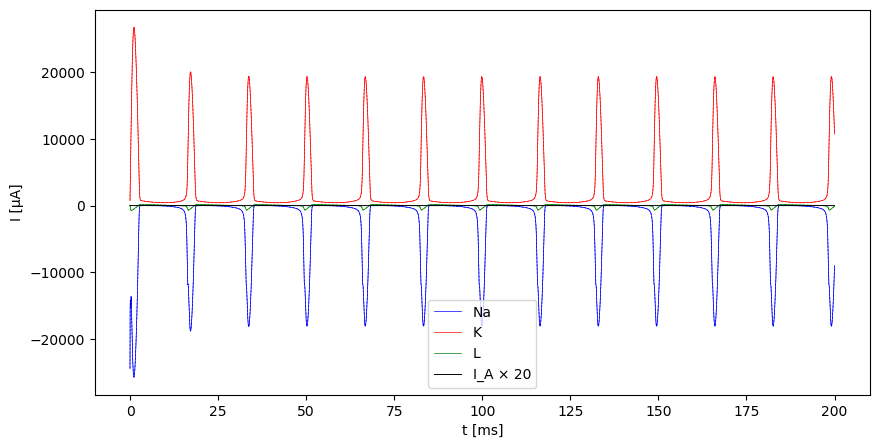

PyObject <matplotlib.legend.Legend object at 0x0000000054C1C278>

In [105]:
fig = figure("pyplot",figsize=(10,5))

# "normal" neuron:
plot(result[1, :], I_Na, color="blue", label="Na",linewidth=0.5)
plot(result[1, :], I_K, color="red", label="K",linewidth=0.5)
plot(result[1, :], I_L, color="green", label="L",linewidth=0.5)

# excited neuron
plot(result[1, :], I_Na_1, color="blue", label="", linestyle="dashed",linewidth=0.5)
plot(result[1, :], I_K_1, color="red",  label="", linestyle="dashed",linewidth=0.5)
plot(result[1, :], I_L_1, color="green", label="", linestyle="dashed",linewidth=0.5)

plot(result[1, :], result[10, :].*20, color="black", label="I_A × 20",linewidth = 0.7)
#plot(result[1, :], result[11, :].*20, color="black", label="I_G × 20",linewidth = 0.7)
xlabel("t [ms]")
ylabel("I [μA]")
legend()

# Mutually inhibitory

In [64]:
function mutually_inhibitory(N, h_int, dt, I0, V0, n0, m0, h0)

    writting_period = Int(floor(dt / h_int))

    data = zeros(11, N)
    
    data[1, 1] = 0 #t
    data[2, 1] = V0[1] #V1
    data[3, 1] = V0[2] #V2
    data[4, 1] = n0[2] #n2
    data[5, 1] = m0[2] #m2
    data[6, 1] = h0[2] #h2
    data[7, 1] = n0[1] #n1
    data[8, 1] = m0[1] #m1
    data[9, 1] = h0[1] #h1
    data[10, 1] = 0 #I excitatory
    data[11, 1] = 0 #I inhibitory
    
    V1 = V0[1]
    n1 = n0[1]
    m1 = m0[1]
    h1 = h0[1]
    
    V2 = V0[2]
    n2 = n0[2]
    m2 = m0[2]
    h2 = h0[2]
    
    r_G1 = 0
    r_G2 = 0
    
    I_A = 0
    I_G = 0
    
    i = 1
    
    t = 0
    
    while i < N
        
        for k in 1 : writting_period
            
            V1_pre = V1
            V2_pre = V2
            
            # 1st neuron 
            n1 += h_int * n_dot(n1, V1)
            m1 += h_int * m_dot(m1, V1)
            h1 += h_int * h_dot(h1, V1)
            
            r_G1 += h_int * r_G_dot(r_G1, V2_pre) # mutually inhibitory 
            
            I_G1 = g_G * r_G1 * (E_G - V1) # mutually inhibitory 
 
            
            V1 += h_int * V_dot(V1, n1, m1, h1, I0, 0, I_G1, t)
            
            # 2nd neuron
            n2 += h_int * n_dot(n2, V2)
            m2 += h_int * m_dot(m2, V2)
            h2 += h_int * h_dot(h2, V2)
            
            r_G2 += h_int * r_G_dot(r_G2, V1_pre) # mutually inhibitory 
            
            I_G2 = g_G * r_G2 * (E_G - V2) # mutually inhibitory 
            
            V2 += h_int * V_dot(V2, n2, m2, h2, I0, 0, I_G2, t)
            
            t += h_int
            
        end
            
        i += 1
        
        data[1, i]= t
        data[2, i] = V1
        data[3, i] = V2
        data[4, i] = n2
        data[5, i] = m2
        data[6, i] = h2
        data[7, i] = n1
        data[8, i] = m1
        data[9, i] = h1
        data[10, i] = I_A 
        data[11, i] = I_G
        
    end
        
    return data
    
end

mutually_inhibitory (generic function with 1 method)

In [65]:
N = 2 * 10^5

h_int = 0.001
dt = h_int

I0 = 280

V0 = [0, 0]
n0 = [0.5, 0.5]
m0 = [0.5, 0.5]
h0 = [0.5, 0.5]

result = mutually_inhibitory(N, h_int, dt, I0, V0, n0, m0, h0)

11×200000 Array{Float64,2}:
 0.0  0.001     0.002    0.003    0.004    …  199.997   199.998    199.999  
 0.0  0.838875  1.66035  2.46529  3.25447       3.6967    3.69857    3.70045
 0.0  0.838875  1.66035  2.46529  3.25447       3.6967    3.69857    3.70045
 0.0  0.0       0.0      0.0      0.0           0.0       0.0        0.0    
 0.0  0.0       0.0      0.0      0.0           0.0       0.0        0.0    
 0.0  0.0       0.0      0.0      0.0      …    0.0       0.0        0.0    
 0.0  0.0       0.0      0.0      0.0           0.0       0.0        0.0    
 0.0  0.0       0.0      0.0      0.0           0.0       0.0        0.0    
 0.0  0.0       0.0      0.0      0.0           0.0       0.0        0.0    
 0.0  0.0       0.0      0.0      0.0           0.0       0.0        0.0    
 0.0  0.0       0.0      0.0      0.0      …    0.0       0.0        0.0    

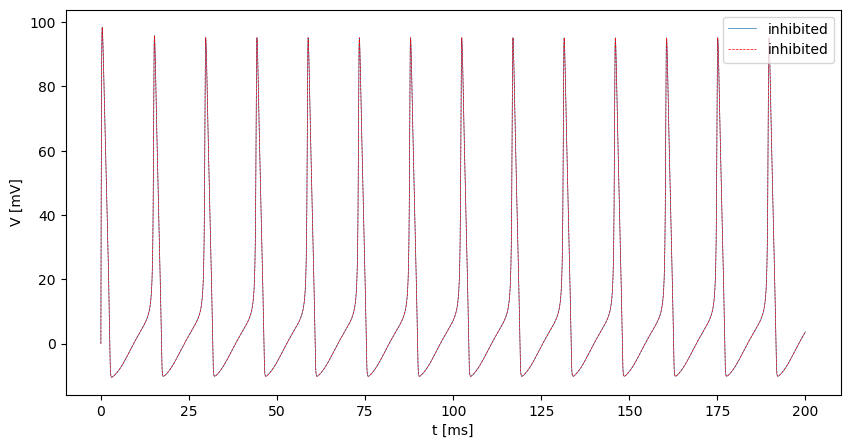

sys:1: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


In [66]:
fig = figure("pyplot",figsize=(10,5))

plot(result[1, :], result[2, :],lw=0.5, label="inhibited")
plot(result[1, :], result[3, :],lw=0.5, label="inhibited",linestyle="dashed",color="red")

xlabel("t [ms]") 
ylabel("V [mV]")

legend()
savefig("Mutual-Inhi.pdf")

In [ ]:
I_Na = @. G_Na * result[5, :]^3 * result[6, :] * (result[3, :] - E_Na) 
I_K = @. G_K * result[4, :]^4 * (result[3, :] - E_K);
I_L = @. G_m * (V_rest - result[3, :]);

I_Na_1 = @. G_Na * result[8, :]^3 * result[9, :] * (result[2, :] - E_Na) 
I_K_1 = @. G_K * result[7, :]^4 * (result[2, :] - E_K);
I_L_1 = @. G_m * (V_rest - result[2, :]);


In [ ]:
fig = figure("pyplot",figsize=(10,5))

# "normal" neuron:
plot(result[1, :], I_Na, color="blue", label="Na",linewidth=0.5)
plot(result[1, :], I_K, color="red", label="K",linewidth=0.5)
plot(result[1, :], I_L, color="green", label="L",linewidth=0.5)

# excited neuron
plot(result[1, :], I_Na_1, color="blue", label="", linestyle="dashed",linewidth=0.5)
plot(result[1, :], I_K_1, color="red",  label="", linestyle="dashed",linewidth=0.5)
plot(result[1, :], I_L_1, color="green", label="", linestyle="dashed",linewidth=0.5)

#plot(result[1, :], result[10, :].*20, color="black", label="I_A times 20",linewidth = 0.7)
plot(result[1, :], result[11, :].*20, color="black", label="I_G × 20",linewidth = 0.7)
xlabel("t [ms]")
ylabel("I [μA]")
legend()

# Mutually excitatory inhibitory 

In [67]:
function mutually_excitatory_inhibitory(N, h_int, dt, I0, V0, n0, m0, h0)

    writting_period = Int(floor(dt / h_int))

    data = zeros(11, N)
    
    data[1, 1] = 0 #t
    data[2, 1] = V0[1] #V1
    data[3, 1] = V0[2] #V2
    data[4, 1] = n0[2] #n2
    data[5, 1] = m0[2] #m2
    data[6, 1] = h0[2] #h2
    data[7, 1] = n0[1] #n1
    data[8, 1] = m0[1] #m1
    data[9, 1] = h0[1] #h1
    data[10, 1] = 0 #I excitatory
    data[11, 1] = 0 #I inhibitory
    
    V1 = V0[1]
    n1 = n0[1]
    m1 = m0[1]
    h1 = h0[1]
    
    V2 = V0[2]
    n2 = n0[2]
    m2 = m0[2]
    h2 = h0[2]
    
    r_G1 = 0
    r_A2 = 0
    
    I_A = 0
    I_G = 0
    
    i = 1
    
    t = 0
    
    while i < N
        
        for k in 1 : writting_period
            
            V1_pre = V1
            V2_pre = V2
            
            # 1st neuron 
            n1 += h_int * n_dot(n1, V1)
            m1 += h_int * m_dot(m1, V1)
            h1 += h_int * h_dot(h1, V1)
            
            r_G1 += h_int * r_G_dot(r_G1, V2_pre) # mutually inhibitory 
            
            I_G1 = g_G * r_G1 * (E_G - V1) # mutually inhibitory 
 
            
            V1 += h_int * V_dot(V1, n1, m1, h1, I0, 0, I_G1, t)
            
            # 2nd neuron
            n2 += h_int * n_dot(n2, V2)
            m2 += h_int * m_dot(m2, V2)
            h2 += h_int * h_dot(h2, V2)
            
            r_A2 += h_int * r_A_dot(r_A2, V1_pre) # mutually excitatory 
            
            I_A2 = g_G * r_A2 * (E_A - V2) # mutually excitatory 
            
            V2 += h_int * V_dot(V2, n2, m2, h2, I0, 0, I_A2, t)
            
            t += h_int
            
        end
            
        i += 1
        
        data[1, i]= t
        data[2, i] = V1
        data[3, i] = V2
        data[4, i] = n2
        data[5, i] = m2
        data[6, i] = h2
        data[7, i] = n1
        data[8, i] = m1
        data[9, i] = h1
        data[10, i] = I_A 
        data[11, i] = I_G
        
    end
        
    return data
    
end

mutually_excitatory_inhibitory (generic function with 1 method)

In [68]:
N = 2 * 10^5

h_int = 0.001
dt = h_int

I0 = 280

V0 = [0, 0]
n0 = [0.5, 0.5]
m0 = [0.5, 0.5]
h0 = [0.5, 0.5]

result = mutually_excitatory_inhibitory(N, h_int, dt, I0, V0, n0, m0, h0)

11×200000 Array{Float64,2}:
 0.0  0.001     0.002    0.003    0.004    …  199.997    199.998    199.999  
 0.0  0.838875  1.66035  2.46529  3.25447       4.30525    4.30719    4.30914
 0.0  0.838875  1.66035  2.46529  3.25447       2.69402    2.69563    2.69724
 0.0  0.0       0.0      0.0      0.0           0.0        0.0        0.0    
 0.0  0.0       0.0      0.0      0.0           0.0        0.0        0.0    
 0.0  0.0       0.0      0.0      0.0      …    0.0        0.0        0.0    
 0.0  0.0       0.0      0.0      0.0           0.0        0.0        0.0    
 0.0  0.0       0.0      0.0      0.0           0.0        0.0        0.0    
 0.0  0.0       0.0      0.0      0.0           0.0        0.0        0.0    
 0.0  0.0       0.0      0.0      0.0           0.0        0.0        0.0    
 0.0  0.0       0.0      0.0      0.0      …    0.0        0.0        0.0    

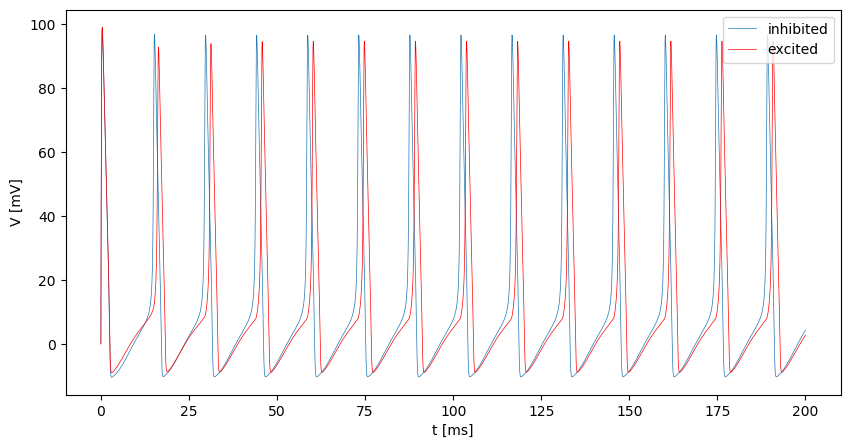

sys:1: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


In [69]:
fig = figure("pyplot",figsize=(10,5))

plot(result[1, :], result[2, :],lw=0.5, label="inhibited")
plot(result[1, :], result[3, :],lw=0.5, label="excited",color="red")

xlabel("t [ms]") 
ylabel("V [mV]")

legend()
savefig("Mutual-Inhi-Exci.pdf")

In [ ]:
I_Na = @. G_Na * result[5, :]^3 * result[6, :] * (result[3, :] - E_Na) 
I_K = @. G_K * result[4, :]^4 * (result[3, :] - E_K);
I_L = @. G_m * (V_rest - result[3, :]);

I_Na_1 = @. G_Na * result[8, :]^3 * result[9, :] * (result[2, :] - E_Na) 
I_K_1 = @. G_K * result[7, :]^4 * (result[2, :] - E_K);
I_L_1 = @. G_m * (V_rest - result[2, :]);

In [ ]:
fig = figure("pyplot",figsize=(10,5))

# "normal" neuron:
plot(result[1, :], I_Na, color="blue", label="Na",linewidth=0.5)
plot(result[1, :], I_K, color="red", label="K",linewidth=0.5)
plot(result[1, :], I_L, color="green", label="L",linewidth=0.5)

# excited neuron
plot(result[1, :], I_Na_1, color="blue", label="", linestyle="dashed",linewidth=0.5)
plot(result[1, :], I_K_1, color="red",  label="", linestyle="dashed",linewidth=0.5)
plot(result[1, :], I_L_1, color="green", label="", linestyle="dashed",linewidth=0.5)

#plot(result[1, :], result[10, :].*20, color="black", label="I_A times 20",linewidth = 0.7)
plot(result[1, :], result[11, :].*20, color="black", label="I_G times 20",linewidth = 0.7)
legend()